# Simplical Complex filtrations


## Vietoris-Rips Complex

Reached max number of simplices (100000) at eps=1.4820977100539505
Rips filtration: 100059 simplices, 2.93 sec.
Reduced matrix in 1578421 steps using 61.55 sec.


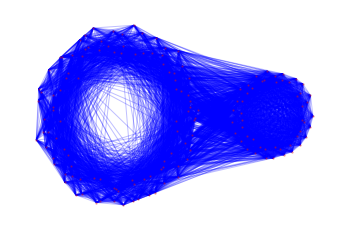

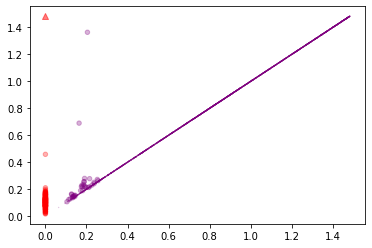

In [73]:
import numpy as np
from topolearn.simpcomplex import RipsComplex, distance_matrix
#from topolearn import persistence as ph
from topolearn import util
from sklearn.datasets import make_moons, make_circles

X1, _ = make_circles(noise=0.05,  n_samples=100, random_state=50)
X2, _ = make_circles(noise=0.05,  n_samples=50, random_state=50)
X2 = X2 * 0.5
X2[:, 0] += 2
X = np.vstack([X1, X2])

learner = RipsComplex(max_simplices = 100000, max_dim = 2, num_steps=1000)
X_dist = distance_matrix(X)

simplices = learner.fit(X_dist)
graph = simplices.graph(X)

bdpairs = simplices.birth_death_pairs()

util.plot_graph_with_data(graph, X)
util.plot_persistance_diagram(bdpairs, max_dim=1)

## Alpha Complex

The same example using alpha complex is a lot sparser and find the same homologies.

Reduced matrix in 2457 steps using 0.01 sec.


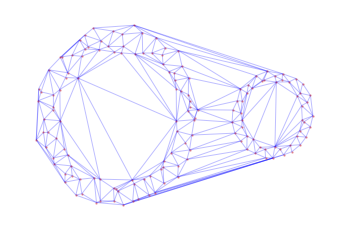

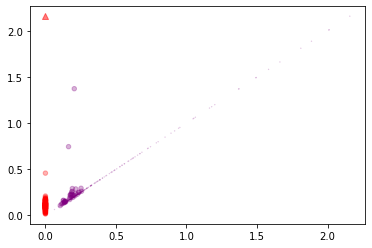

In [74]:
import numpy as np
from topolearn.simpcomplex import AlphaComplex, distance_matrix
from topolearn import util
from sklearn.datasets import make_moons, make_circles

X1, _ = make_circles(noise=0.05,  n_samples=100, random_state=50)
X2, _ = make_circles(noise=0.05,  n_samples=50, random_state=50)
X2 = X2 * 0.5
X2[:, 0] += 2
X = np.vstack([X1, X2])

learner = AlphaComplex()
simplices = learner.fit(X)
graph = simplices.graph(X)

bdpairs = simplices.birth_death_pairs()

util.plot_graph_with_data(graph, X)
util.plot_persistance_diagram(bdpairs, max_dim=1)

## Density filtration

To add density to the filtration we can use a density-weighted distance matrix. The function ``topolearning.simpcomplex.distance_matrix_mreach`` computes a distance matrix using the mutal reachability distance used by the HDBSCAN algorithm.

This distance matrix can be used either directly by the RipsComplex filtration, or as edge weights to the AlphaComplex filtration, as shown below.

Reduced matrix in 47151 steps using 0.52 sec.


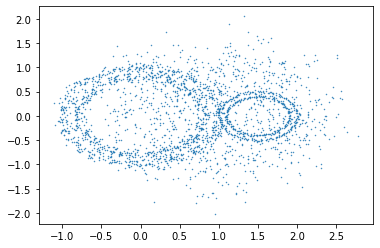

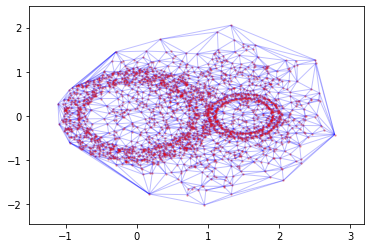

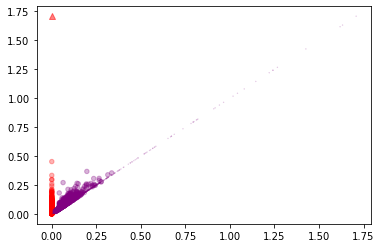

In [75]:
import numpy as np
from topolearn.simpcomplex import AlphaComplex, distance_matrix, distance_matrix_mreach
from topolearn import util
from sklearn.datasets import make_moons, make_circles


import matplotlib.pyplot as pl

# The same two circles as above
X1, _ = make_circles(noise=0.05, n_samples=1000, random_state=10)
X2, _ = make_circles(noise=0.025, n_samples=400, random_state=20)
X2 = X2 * 0.5
X2[:, 0] += 1.5
# Add a noisy circle on top 
Xnoise, _ = make_circles(noise=0.4,  n_samples=1000, random_state=30)
Xnoise[:, 0] += 1
X = np.vstack([X1, X2, Xnoise])
pl.scatter(X[:,0], X[:,1], s=0.2)

# Do an ordinary alphacomplex filtration
learner = AlphaComplex()
simplices = learner.fit(X)
graph = simplices.graph(X)
bdpairs = simplices.birth_death_pairs()

util.plot_graph_with_data(graph, X, axis=True)
util.plot_persistance_diagram(bdpairs, max_dim=1)





The homologies are lost in the noise. With the mreach distance matrix as weights, the homologies from the circles are clearly visible, and the noise disappears.

Reduced matrix in 45049 steps using 0.43 sec.


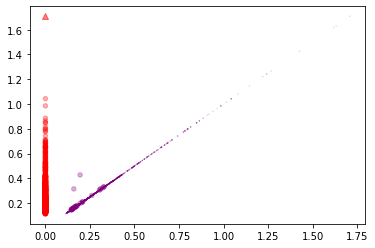

In [76]:
# Compute a mreach-distance-matrix, and use this as edge weights for the 
# alpha complex.
X_dist_mreach =  distance_matrix_mreach(X,50)
simplices = learner.fit(X, X_dist_mreach)
bdpairs = simplices.birth_death_pairs()
util.plot_persistance_diagram(bdpairs, max_dim=1)
